# K-Means algorithm implementation, using kmeans++ centroid initialization

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
import math

Generating the points

In [2]:
points = np.vstack(((np.random.randn(150, 2) * 0.75 + np.array([1, 0])),
                  (np.random.randn(50, 2) * 0.25 + np.array([-0.5, 0.5])),
                  (np.random.randn(50, 2) * 0.5 + np.array([-0.5, -0.5]))))

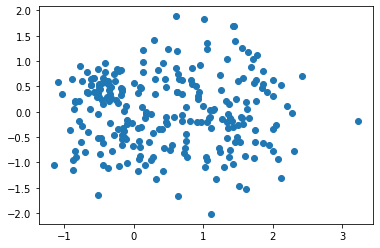

In [3]:
plt.scatter(points[:, 0], points[:, 1])
ax = plt.gca()

In [30]:
class KMeans:
    COLORS = ['green', 'blue', 'orange', '#777', 'yellow', 'black', 'purple']  # color palette for plotting clusters
    
    def __init__(self, data, k):
        self.data = data           # points in twodimensional space
        self.K = k                 # number of clusters
        self.cost = 0
        self.centroids = self.init_centroids()
        self.run()
        
    def init_centroids(self):
        """ Initializes the centroids, using k-means++ algorithm. """
        
        centroids = [list(self.data[0])]  # initialize first centroid as the first point in the dataset
        
        for _ in range(1, self.K):
            dist_sq = np.array([min([np.inner(c-x,c-x) for c in centroids]) for x in self.data])
            probs = dist_sq/dist_sq.sum()
            cumulative_probs = probs.cumsum()
            r = np.random.rand()

            for j, p in enumerate(cumulative_probs):
                if r < p:
                    i = j
                    break
        
            centroids.append(list(self.data[i]))
            
        return centroids
        
        
    def calculate_distance(self, p,c):
        """ Calculates the Euclidean distance between two points. 
        :param p: coordinates of the point
        :param c: coordinates of the centroid. """
        return math.sqrt((p[0]-c[0])**2 + (p[1] - c[1])**2)


    def get_clusters(self, centroids):
        """ Function returns generator with values of the closest cluster from each point. 
        :param centroids: list, coordinates of centroids. """
                             
        point_distances=[]             # distances for each centroid from the current point
        for point in points:
            for centroid in centroids:
                distance = self.calculate_distance(point, centroid)
                point_distances.append(distance)

            yield np.argmin(point_distances) + 1   
            point_distances.clear()             
            
    def cluster_size(self, c):
        """ Amount of points in the cluster. 
        :param c: int, number of cluster (1,..,K) """
        
        clusters = list(self.get_clusters(self.centroids))
        return clusters.count(c)
    
    def cluster_middle(self, c):
        """ Computes the middle point in specified cluster. 
        :param c: number of cluster (1,..,K)
        :return tuple: coordinates of the cluster middle """
        
        clusters = list(self.get_clusters(self.centroids))
        size = self.cluster_size(c)                   # amount of elements in the cluster
        pts = [points[i] for i in range(len(points)) if clusters[i]==c]     # coordinates of all points in the cluster

        sum_x, sum_y = 0,0
        for p in pts:
            sum_x += p[0]
            sum_y += p[1]

        return (sum_x/size, sum_y/size)
                             
    def plot(self, closest_clusters, centroids):
        """ Plots the final clusters visualization, along with information about sizes of each cluster.
        :param closest_clusters: values of the clusters assigned to each point, e.g: 1,4,3,2,1,3,1,2...
        :param centroids: coordinates of the centroids. """
        
        fig = plt.figure()
        ax1 = fig.add_subplot(111)

        point_colors = [KMeans.COLORS[c-1] for c in closest_clusters]     # colors of every point on the plot

        ax1.scatter(points[:, 0], points[:, 1], c=point_colors)
        ax1.scatter([coordinates[0] for coordinates in centroids], [coordinates[1] for coordinates in centroids], c='red')
        ax1.grid()

        for i in range(1,self.K+1):
            print(f'Cluster {i}: {self.cluster_size(i)}')
            
    def compute_cost(self, clusters, centroids):
        """ Cost function for the dataset. """
        cost = 0
        for cluster,point in zip(clusters, points):
            closest_centroid = centroids[cluster-1]
            distance = self.calculate_distance(point, closest_centroid)
            cost += distance
        return cost
                             
    def run(self):
        """ Main function. While centroids are not final, function computes the middle of each cluster, and assign all points,
        that are closest to specific cluster. After that, plots the clusters and returns info about cluster sizes and 
        amount of iterations needed to find the solution. """
                             
        final_clusters = False
        clusters = None
        iterations = 0        # how many times centroids have been changed 
                             
        while not final_clusters:
            centroids = [self.cluster_middle(i) for i in range(1, self.K+1)]
            if centroids == self.centroids:        # if positions of centroids hasn't changed
                final_clusters = True
                self.plot(clusters, centroids)
                self.cost = self.compute_cost(clusters, centroids)
                print(f'Iterations: {iterations}')
            else:
                self.centroids = centroids
                clusters = list(self.get_clusters(self.centroids))
                iterations += 1

# Choosing the best K value, using the Elbow method

Text(0, 0.5, 'Cost function')

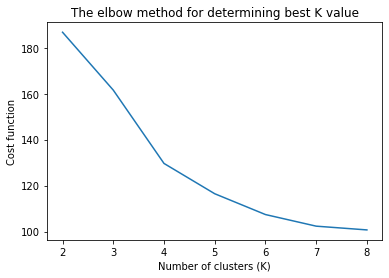

In [25]:
costs = []
for i in range(2,9):
    kmeans = KMeans(points, i)
    costs.append(kmeans.cost)
    
plt.plot(list(range(2,9)), costs)
plt.title('The elbow method for determining best K value')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Cost function')

The elbow method is an easy and efficient way to determine the best number of clusters for our problem. 
It uses the computed cost function, which is sum of distances between each point and the centroid of cluster, to which the point belongs. The optimal K value for this dataset is 4.

# Plotting the results

Cluster 1: 66
Cluster 2: 70
Cluster 3: 52
Cluster 4: 62
Iterations: 9


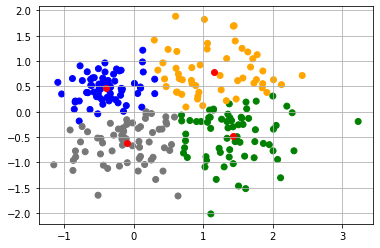

In [29]:
kmeans = KMeans(points, 4)